{'A': 0.005*x + 0.06,
 'I_y': poly1d([2.60416666666667e-7, 9.37500000000001e-6, 0.000112500000000000,
       0.000450000000000000], dtype=object),
 'I_z': poly1d([1.66666666666667e-5, 0.000200000000000000], dtype=object),
 'b_render': 0.2,
 'eta_y': array([1.00000000000000, 0.250000000000000, 0.0208333333333334,
       0.000578703703703704], dtype=object),
 'eta_z': array([1.00000000000000, 0.0833333333333334], dtype=object),
 'h_render': 0.025*x + 0.3,
 'y_s': 0.1,
 'z_s': 0.0125*x + 0.15}
I_y(0) =  0.000450000000000000
I_y(l) =  0.00106666666666667


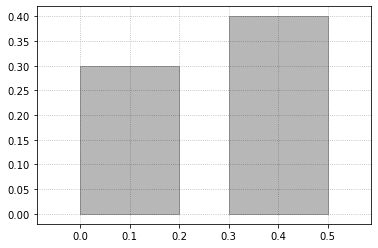

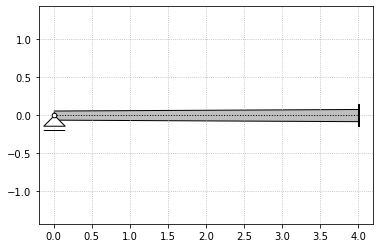

In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import stanpy as stp

x = sym.Symbol("x")
l = 4  # m
E = 2.1e8
b, ha, hb = 0.2, 0.3, 0.4  # m
hx = ha + (hb - ha) / l * x  # m
cs = stp.cs(b=b, h=hx)

s = {"E": E, "cs": cs, "q": 10, "l": l, "bc_i": {"w": 0, "M": 0, "H": 0}, "bc_k": {"w": 0, "phi": 0}}

print(cs)
print("I_y(0) = ", cs["I_y"](0))
print("I_y(l) = ", cs["I_y"](l))

offset = 0.2
fig, ax = plt.subplots()
stp.plot_cs(ax, b, hx.subs(x, 0))
stp.plot_cs(ax, b, hx.subs(x, l), dy=0.3)

ax.set_xlim(-offset, b + offset)
ax.set_ylim(-offset, float(hx.subs(x, l)) + offset)
ax.grid(linestyle=":")
ax.axis('equal')

plt.show()

fig, ax = plt.subplots()
stp.plot_system(ax, s, render=True, facecolor="gray", alpha=0.5, render_scale=0.4)
ax.grid(linestyle=":")
ax.axis('equal')

plt.show()

{'A': 0.0003*x + 0.0116,
 'I_y': poly1d([-3.32192499788493e-26, 1.28447766584884e-24, 1.56250000000000e-8,
       1.81250000000000e-6, 3.87500000000000e-5, 0.000232066666666667],
      dtype=object),
 'I_z': poly1d([-5.19050780919520e-28, 2.00699635288881e-26, -7.76038589783674e-25,
       3.00068254716354e-23, 3.59999999999985e-9, 2.67098666666666e-5],
      dtype=object),
 'b_render': 0.41200000000000003,
 'eta_y': array([1.00000000000000, 0.166977879919563, 0.00781025567365700,
       6.73297902901466e-5, 5.53495115993467e-21, -1.43145288619000e-22],
      dtype=object),
 'eta_z': array([1.00000000000000, 0.000134781653720967, 1.12343598888434e-18,
       -2.90543790228708e-20, 7.51406354039762e-22, -1.94329229493042e-23],
      dtype=object),
 'h_render': 0.025*x + 0.34,
 'y_s': (3.0e-5*x + 0.00116)/(0.0003*x + 0.0116),
 'z_s': (0.0001*x + (0.0003*x + 0.0036)*(0.0125*x + 0.17) + 0.00136)/(0.0003*x + 0.0116)}
I_y(0) =  0.000232066666666667
I_y(l) =  0.000417066666666667


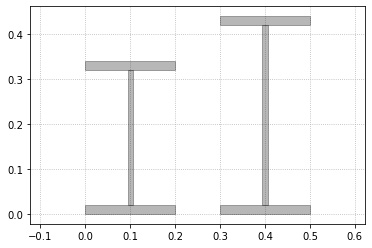

In [2]:
import numpy as np
import sympy as sym
import stanpy as stp

x = sym.Symbol("x")
l = 4  # m
s, t = 0.012, 0.02  # m
b, ha, hb = 0.2, 0.3, 0.4  # m
hx = ha + (hb - ha) / l * x  # m

b_v = np.array([b, s, b])
h_v = np.array([t, hx, t])
zsi_v = np.array([t / 2, t + hx/ 2, t + hx + t / 2])  # von OK
ysi_v = np.array([b / 2, b / 2, b / 2])  # von Links

cs_props = stp.cs(b=b_v, h=h_v, y_si=ysi_v, z_si=zsi_v)

print(cs_props)
print("I_y(0) = ", cs_props["I_y"](0))
print("I_y(l) = ", cs_props["I_y"](l))

h_v_fun = sym.lambdify(x, h_v, 'numpy')
zsi_v_fun = sym.lambdify(x, zsi_v, 'numpy')

offset = 0.2
fig, ax = plt.subplots()
stp.plot_cs(ax, b_v, h_v_fun(0), ysi_v, zsi_v_fun(0))
stp.plot_cs(ax, b_v, h_v_fun(l), ysi_v, zsi_v_fun(l), dy=0.3)

ax.set_xlim(-offset, b + offset)
ax.set_ylim(-offset, float(hx.subs(x, l)) + offset)
ax.grid(linestyle=":")
ax.axis('equal')

plt.show()

{'A': 0.0003*x + 0.01112,
 'I_y': poly1d([5.35080405672537e-27, -1.98336470369287e-25, 1.56250000000000e-8,
       1.73750000000000e-6, 3.30700000000000e-5, 0.000174642666666667],
      dtype=object),
 'I_z': poly1d([-1.33770101418134e-27, 4.95841175923217e-26, -1.83791795875539e-24,
       6.81254923378666e-23, 3.59999999999858e-9, 2.67041066666667e-5],
      dtype=object),
 'b_render': 0.41200000000000003,
 'eta_y': array([1.00000000000000, 0.189358079736147, 0.00994888610648793,
       8.94684002382005e-5, -1.13567018962121e-21, 3.06385842523707e-23],
      dtype=object),
 'eta_z': array([1.00000000000000, 0.000134810725741006, 2.55112418431521e-18,
       -6.88252927423169e-20, 1.85679746606970e-21, -5.00934568184272e-23],
      dtype=object),
 'h_render': 0.025*x + 0.3,
 'y_s': (3.0e-5*x + 0.001112)/(0.0003*x + 0.01112),
 'z_s': (0.0001*x + (0.0003*x + 0.00312)*(0.0125*x + 0.15) + 0.0012)/(0.0003*x + 0.01112)}
I_y(0) =  0.000174642666666667
I_y(l) =  0.000335722666666667


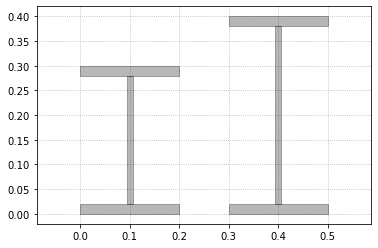

In [3]:
import numpy as np
import sympy as sym
import stanpy as stp

x = sym.Symbol("x")
l = 4  # m
s, t = 0.012, 0.02  # m
b, ha, hb = 0.2, 0.3, 0.4  # m
hx = ha + (hb - ha) / l * x  # m

b_v = np.array([b, s, b])
h_v = np.array([t, hx - 2 * t, t])
zsi_v = stp.AI_z.dot(h_v) # von OK
ysi_v = stp.AI_y.dot(b_v)  # von Links

cs_props = stp.cs(b=b_v, h=h_v, y_si=ysi_v, z_si=zsi_v)

print(cs_props)
print("I_y(0) = ", cs_props["I_y"](0))
print("I_y(l) = ", cs_props["I_y"](l))

h_v_fun = sym.lambdify(x, h_v, 'numpy')
zsi_v_fun = sym.lambdify(x, zsi_v, 'numpy')

offset = 0.2
fig, ax = plt.subplots(1)
stp.plot_cs(ax, b_v, h_v_fun(0), ysi_v, zsi_v_fun(0))
stp.plot_cs(ax, b_v, h_v_fun(l), ysi_v, zsi_v_fun(l), dy=0.3)

ax.set_xlim(-offset, b + offset)
ax.set_ylim(-offset, float(hx.subs(x, l)) + offset)
ax.grid(linestyle=":")
ax.axis('equal')

plt.show()

{'A': 0.0013*x + 0.01512,
 'I_y': poly1d([5.20833333333334e-8, 1.87500000000000e-6, 2.25036000000000e-5,
       9.00374400000000e-5], dtype=object),
 'I_z': poly1d([-1.40155330013444e-24, 1.63011429984867e-23, 1.71875000000000e-7,
       5.86250000000000e-6, 6.67033333333333e-5, 0.000253176000000000],
      dtype=object),
 'b_render': 0.025*x + 0.3,
 'eta_y': array([1.00000000000000, 0.249936026612929, 0.0208246702705008,
       0.000578463063069467], dtype=object),
 'eta_z': array([1.00000000000000, 0.263466257991805, 0.0231558283565583,
       0.000678875564824469, 6.43866045694960e-20, -5.53588531351486e-21],
      dtype=object),
 'h_render': 0.05*x + 0.612,
 'y_s': (5.0e-6*x + (0.0003*x + 0.00312)*(0.0125*x + 0.15) + (0.0005*x + 0.006)*(0.025*x + 0.29) + 6.0e-5)/(0.0013*x + 0.01512),
 'z_s': ((0.0003*x + 0.00312)*(0.0125*x + 0.15) + 2*(0.0005*x + 0.006)*(0.0125*x + 0.15))/(0.0013*x + 0.01512)}
I_y(0) =  9.00374400000000e-5
I_y(l) =  0.000213385173333333


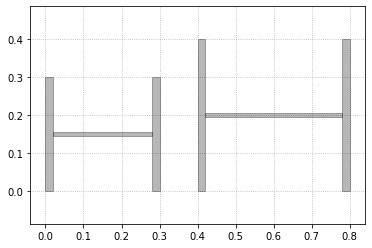

In [4]:
import numpy as np
import sympy as sym
import stanpy as stp

x = sym.Symbol("x")
l = 4  # m
s, t = 0.012, 0.02  # m
ba, bb, ha, hb = 0.3, 0.4, 0.3, 0.4  # m
hx = ha + (hb - ha) / l * x  # m
bx = ba + (bb - ba) / l * x  # m

b_v = np.array([t, hx - 2 * t, t])
h_v = np.array([bx, s, bx])
zsi_v = stp.AH_z.dot(h_v)  # von OK
ysi_v = stp.AH_y.dot(b_v)  # von Links

cs_props = stp.cs(b=b_v, h=h_v, y_si=ysi_v, z_si=zsi_v)

print(cs_props)
print("I_y(0) = ", cs_props["I_y"](0))
print("I_y(l) = ", cs_props["I_y"](l))

b_v_fun = sym.lambdify(x, b_v, 'numpy')
h_v_fun = sym.lambdify(x, h_v, 'numpy')
zsi_v_fun = sym.lambdify(x, zsi_v, 'numpy')
ysi_v_fun = sym.lambdify(x, ysi_v, 'numpy')

offset = 0.2
fig, ax = plt.subplots(1)
stp.plot_cs(ax, b_v_fun(0), h_v_fun(0), ysi_v_fun(0), zsi_v_fun(0))
stp.plot_cs(ax, b_v_fun(l), h_v_fun(l), ysi_v_fun(l), zsi_v_fun(l), dy=0.4)

ax.grid(linestyle=":")
ax.axis('equal')

plt.show()

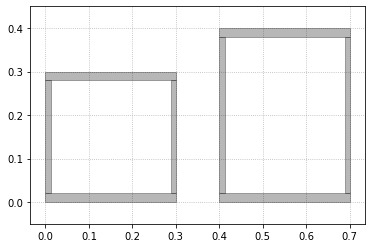

In [5]:
import numpy as np
import sympy as sym
import stanpy as stp

x = sym.Symbol("x")
l = 4  # m
s, t = 0.012, 0.02  # m
b, ha, hb = 0.3, 0.3, 0.4  # m
hx = ha + (hb - ha) / l * x  # m

b_v = np.array([b, s, s, b])
h_v = np.array([t, hx - 2 * t, hx - 2 * t, t])
zsi_v = stp.AK_z.dot(h_v)  # von OK
ysi_v = stp.AK_y.dot(b_v)  # von Links

cs_props = stp.cs(b=b_v, h=h_v, y_si=ysi_v, z_si=zsi_v)

h_v_fun = sym.lambdify(x, h_v, 'numpy')
zsi_v_fun = sym.lambdify(x, zsi_v, 'numpy')

offset = 0.2
fig, ax = plt.subplots()
stp.plot_cs(ax, b_v, h_v_fun(0), ysi_v, zsi_v_fun(0))
stp.plot_cs(ax, b_v, h_v_fun(l), ysi_v, zsi_v_fun(l), dy=0.4)

ax.set_xlim(-offset, b + offset)
ax.set_ylim(-offset, float(hx.subs(x, l)) + offset)
ax.grid(linestyle=":")
ax.axis('equal')

plt.show()

{'A': 0.0003*x + 0.01752,
 'I_y': poly1d([1.67913029595183e-26, -9.80612092835870e-25, 1.56250000000000e-8,
       2.73750000000000e-6, 5.33700000000000e-5, 0.000280135999999995],
      dtype=object),
 'I_z': poly1d([1.74909405828316e-28, -1.02147093003736e-26, 5.96539023141821e-25,
       -3.48378789514823e-23, 3.60000000000027e-9, 0.000139832640000000],
      dtype=object),
 'b_render': 0.66,
 'eta_y': array([1.00000000000000, 0.190514607190797, 0.00977203929519965,
       5.57764799954318e-5, -3.50048580987766e-21, 5.99398255116037e-23],
      dtype=object),
 'eta_z': array([1.00000000000000, 2.57450620970917e-5, -2.49139821371336e-19,
       4.26609283170096e-21, -7.30495347894000e-23, 1.25084819844863e-24],
      dtype=object),
 'h_render': 0.025*x + 0.5,
 'y_s': (4.5e-5*x + 0.002628)/(0.0003*x + 0.01752),
 'z_s': (0.00018*x + (0.0003*x + 0.00312)*(0.0125*x + 0.15) + 0.00216)/(0.0003*x + 0.01752)}


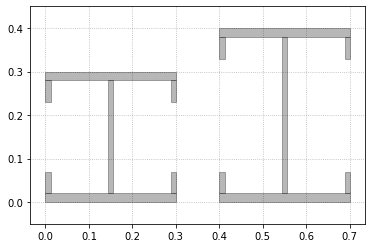

In [6]:
import numpy as np
import sympy as sym
import stanpy as stp

x = sym.Symbol("x")
l = 4  # m
s, t = 0.012, 0.02  # m
b, ha, hb = 0.3, 0.3, 0.4  # m
hx = ha + (hb - ha) / l * x  # m

b_v = np.array([b, s, s, b])
h_v = np.array([t, hx - 2 * t, hx - 2 * t, t])
h_i = 0.05

b_v = np.array([b, s, b, s, s, s, s])
h_v = np.array([t, hx - 2 * t, t, h_i, h_i, h_i, h_i])
zsi_v = stp.AI_zp.dot(h_v)  # von OK
ysi_v = stp.AI_yp.dot(b_v)  # von Links

cs_props = stp.cs(b=b_v, h=h_v, y_si=ysi_v, z_si=zsi_v)

print(cs_props)

h_v_fun = sym.lambdify(x, h_v, 'numpy')
zsi_v_fun = sym.lambdify(x, zsi_v, 'numpy')

offset = 0.2
fig, ax = plt.subplots()
stp.plot_cs(ax, b_v, h_v_fun(0), ysi_v, zsi_v_fun(0))
stp.plot_cs(ax, b_v, h_v_fun(l), ysi_v, zsi_v_fun(l), dy=0.4)

ax.set_xlim(-offset, b + offset)
ax.set_ylim(-offset, float(hx.subs(x, l)) + offset)
ax.grid(linestyle=":")
ax.axis('equal')

plt.show()